In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [ ]:
#import data
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [ ]:
#quick view of data
print("Customers DataFrame shape:", customers_df.shape)
print("Products DataFrame shape:", products_df.shape)
print("Transactions DataFrame shape:", transactions_df.shape)

Customers DataFrame shape: (200, 4)
Products DataFrame shape: (100, 4)
Transactions DataFrame shape: (1000, 7)


In [ ]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Data Cleaning and Preprocessing

In [ ]:
#Removing duplicates by ID
customers_df.drop_duplicates(subset='CustomerID', keep='first', inplace=True)
products_df.drop_duplicates(subset='ProductID', keep='first', inplace=True)
transactions_df.drop_duplicates(subset='TransactionID', keep='first', inplace=True)

In [ ]:
#merge dataframes to get complete view
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')
print(merged_df.shape)
merged_df.head()

(1000, 13)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
print("\nDescriptive stats of merged numeric columns:")
merged_df.describe()


Descriptive stats of merged numeric columns:


,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


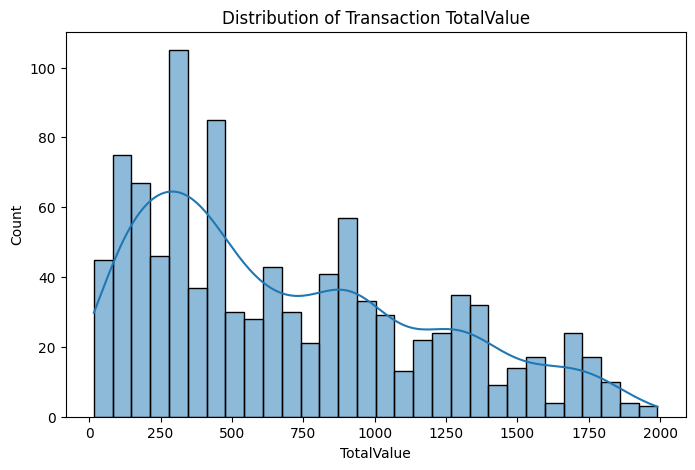

In [ ]:
# Distribution of transaction total value
plt.figure(figsize=(8,5))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction TotalValue')
plt.show()

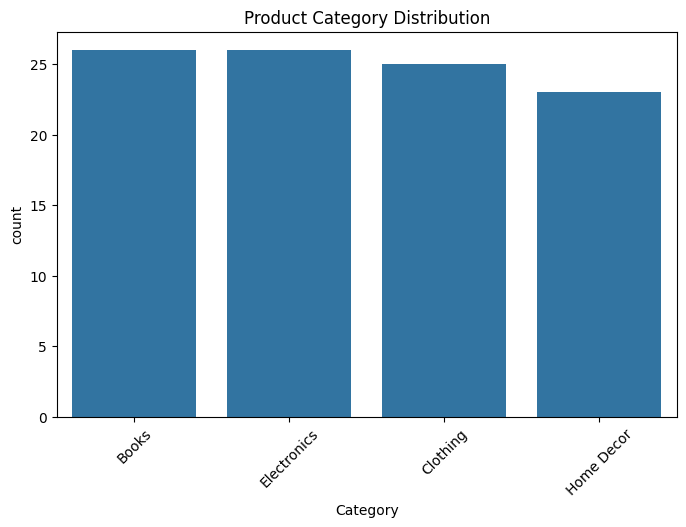

In [ ]:
# Count plot of product categories
plt.figure(figsize=(8,5))
sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

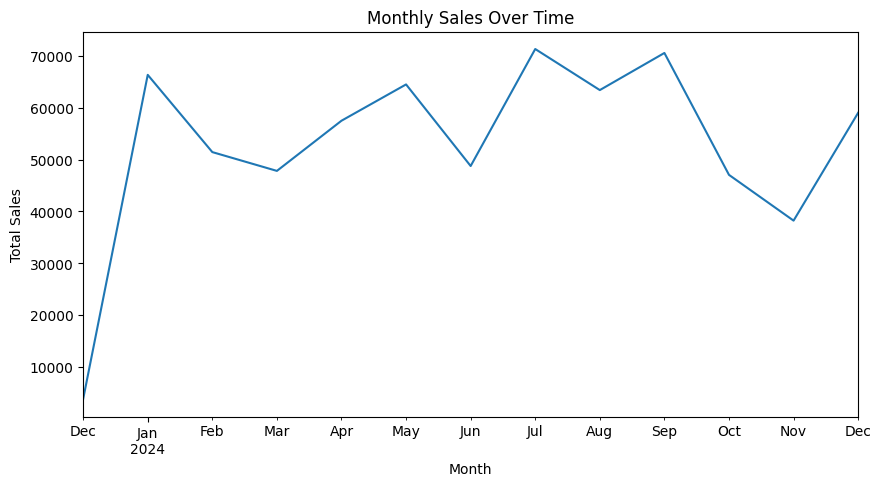

In [ ]:
# Transactions over time
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df.set_index('TransactionDate', inplace=True)
monthly_sales = merged_df.resample('ME')['TotalValue'].sum()
merged_df.reset_index(inplace=True)
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

In [ ]:
#Top customers by total spending
customer_spend = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False)
print("\nTop 5 customers by total spending:")
customer_spend.head()


Top 5 customers by total spending:


,CustomerID,TotalValue
140,C0141,10673.87
53,C0054,8040.39
64,C0065,7663.70
155,C0156,7634.45
81,C0082,7572.91


In [ ]:
#Region-wise sales
region_sales = merged_df.groupby('Region')['TotalValue'].sum().reset_index().sort_values('TotalValue', ascending=False)
print("\nRegion-wise total sales:")
region_sales


Region-wise total sales:


,Region,TotalValue
3,South America,219352.56
1,Europe,166254.63
2,North America,152313.40
0,Asia,152074.97


In [ ]:
# Extract the monthly or weekly signup date
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Count how many customers signed up each month
monthly_signups = customers_df.groupby('SignupMonth')['CustomerID'].count().reset_index()
monthly_signups.rename(columns={'CustomerID':'Signups'}, inplace=True)

print("Signups per month:")
monthly_signups.head()

Signups per month:


,SignupMonth,Signups
0,2022-01,1
1,2022-02,7
2,2022-03,8
3,2022-04,8
4,2022-05,8


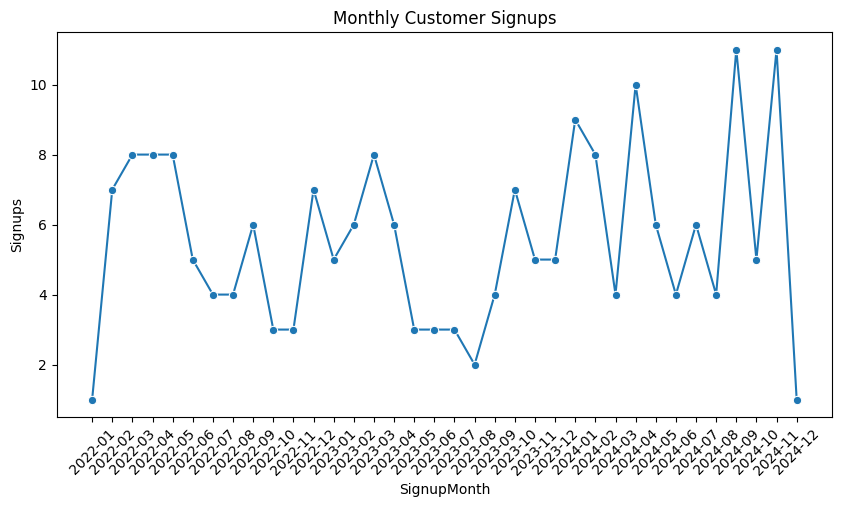

In [ ]:
# Plot the trend
monthly_signups['SignupMonth'] = monthly_signups['SignupMonth'].astype(str)
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_signups, x='SignupMonth', y='Signups', marker='o')
plt.title('Monthly Customer Signups')
plt.xticks(rotation=45)
plt.show()

Top 5 Products by Total Revenue:
              ProductName  TotalValue
9   ActiveWear Smartwatch    39096.97
47   SoundWave Headphones    25211.64
52        SoundWave Novel    24507.90
4       ActiveWear Jacket    22712.56
6          ActiveWear Rug    22314.43

Top Categories by Total Revenue:
      Category  TotalValue
0        Books   192147.47
2  Electronics   180783.50
1     Clothing   166170.66
3   Home Decor   150893.93


<ipython-input-60-bae28357b3e0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Category', y='TotalValue', palette='Set2')


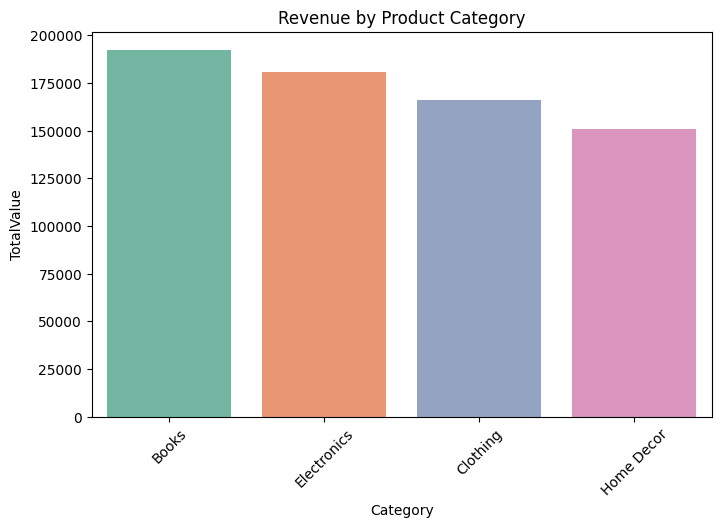

In [ ]:
# Top Selling Products and Categories

# (A) Top-selling products by revenue
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().reset_index()
top_products = top_products.sort_values('TotalValue', ascending=False)
print("Top 5 Products by Total Revenue:")
print(top_products.head(5))

# (B) Top-selling categories by revenue
top_categories = merged_df.groupby('Category')['TotalValue'].sum().reset_index()
top_categories = top_categories.sort_values('TotalValue', ascending=False)
print("\nTop Categories by Total Revenue:")
print(top_categories)

# Quick bar plot for categories
plt.figure(figsize=(8,5))
sns.barplot(data=top_categories, x='Category', y='TotalValue', palette='Set2')
plt.title('Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()


<ipython-input-61-ba6e623f1b1f>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_df['TotalValue'].resample('M').sum()


Monthly Sales:
       Month  TotalSales
0 2023-12-31     3769.52
1 2024-01-31    66376.39
2 2024-02-29    51459.27
3 2024-03-31    47828.73
4 2024-04-30    57519.06

Month-over-Month Growth (%):
       Month  MoM_Growth_%
0 2023-12-31           NaN
1 2024-01-31   1660.871145
2 2024-02-29    -22.473533
3 2024-03-31     -7.055172
4 2024-04-30     20.260479


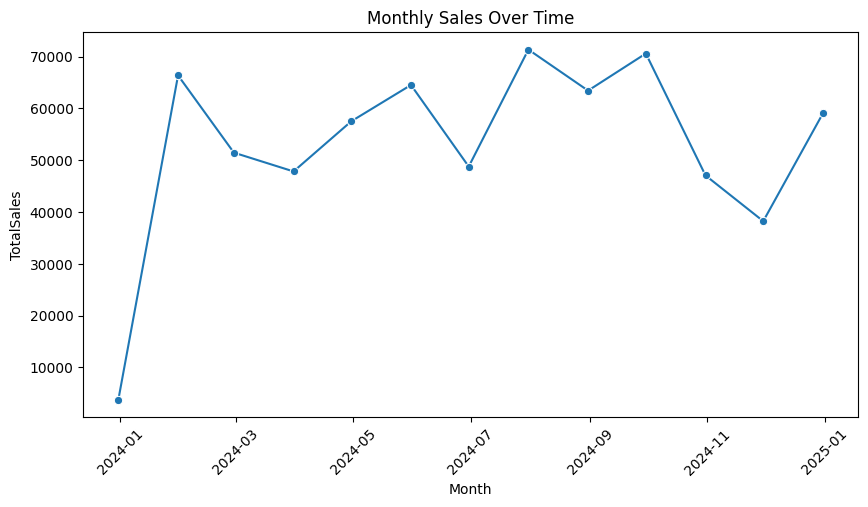

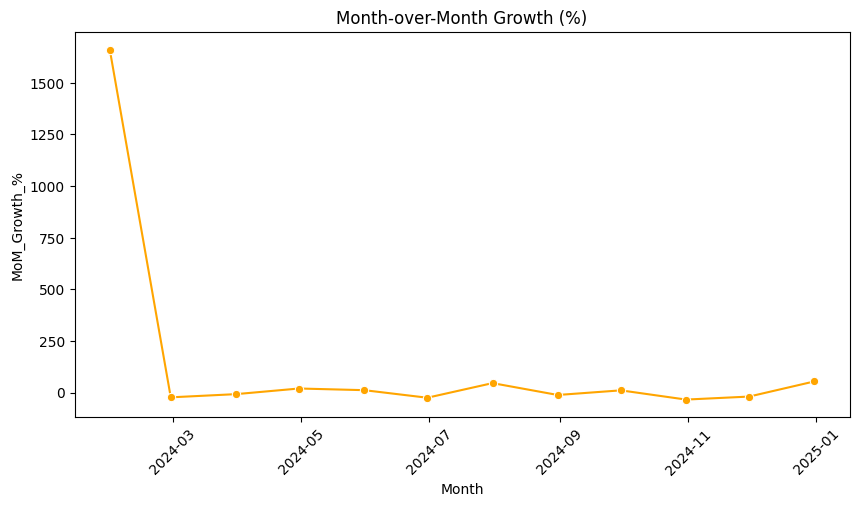

In [ ]:
# Seasonality and Month-over-Month Growth

# Ensure 'TransactionDate' in merged_df is a datetime
# If not, convert: merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'], errors='coerce')

# Temporarily set index to TransactionDate for resampling
merged_df.set_index('TransactionDate', inplace=True)

# Calculate monthly sales
monthly_sales = merged_df['TotalValue'].resample('M').sum()

# Calculate month-over-month percent change
monthly_pct_change = monthly_sales.pct_change() * 100

# Reset index if you wish to plot easily with seaborn
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['Month', 'TotalSales']
monthly_pct_change_df = monthly_pct_change.reset_index()
monthly_pct_change_df.columns = ['Month', 'MoM_Growth_%']

# Print the data
print("Monthly Sales:")
print(monthly_sales_df.head())
print("\nMonth-over-Month Growth (%):")
print(monthly_pct_change_df.head())

# Plot monthly sales
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales_df, x='Month', y='TotalSales', marker='o')
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.show()

# Plot MoM growth
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_pct_change_df, x='Month', y='MoM_Growth_%', marker='o', color='orange')
plt.title('Month-over-Month Growth (%)')
plt.xticks(rotation=45)
plt.show()

# Reset the index if needed for further analysis
merged_df.reset_index(inplace=True)


Distribution of Buyer Types:
  BuyerType  Count
0    Repeat    187
1  One-Time     12


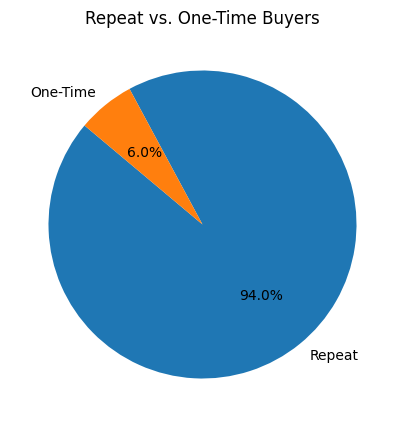

In [ ]:
# Repeat Purchases vs. One-Time Buyers

# Count the number of unique transactions per customer
transactions_count = merged_df.groupby('CustomerID')['TransactionID'].nunique().reset_index()
transactions_count.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)

# Define repeat purchaser vs. one-time
transactions_count['BuyerType'] = transactions_count['NumTransactions'].apply(lambda x: 'Repeat' if x > 1 else 'One-Time')

# Calculate distribution
buyer_dist = transactions_count['BuyerType'].value_counts().reset_index()
buyer_dist.columns = ['BuyerType', 'Count']
print("Distribution of Buyer Types:")
print(buyer_dist)

# Plot the distribution
plt.figure(figsize=(5,5))
plt.pie(buyer_dist['Count'], labels=buyer_dist['BuyerType'], autopct='%1.1f%%', startangle=140)
plt.title('Repeat vs. One-Time Buyers')
plt.show()
